# Imports

In [1]:
# Import packages
import os, time, json
import tmdbsimple as tmdb 
import pandas as pd
from tqdm.notebook import tqdm_notebook

In [2]:
#load API Credentials
with open('/Users/17175/.secret/tmdb_api.json','r') as f:
    login = json.load(f)

In [3]:
#instantiate tmdbapi variable
tmdb.API_KEY = login['api-key']

# Define Custom Functions

In [4]:
def get_movie_with_rating(movie_id):
    """Adapted from source = https://github.com/celiao/tmdbsimpl"""
    #Get the movie object for the current id
    movie = tmdb.Movies(movie_id)

    #Save the .info .releases dictionaries
    info = movie.info()

    releases = movie.releases()
    #Loop through countries in releases
    for c in releases['countries']:
        #If the country abbreviation==US
        if c['iso_3166_1'] =='US':
            ##Save a 'certification' key in info with the certification
            info['certification'] = c['certification']

    return info

In [5]:
def write_json(new_data, filename): 
    """Appends a list of records (new_data) to a json file (filename). 
    Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/"""  
    
    with open(filename,'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        ## Choose extend or append
        if (type(new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
             file_data.append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file)

# Test TMDB Extraction Works

In [6]:
get_movie_with_rating("tt0848228")

{'adult': False,
 'backdrop_path': '/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg',
 'belongs_to_collection': {'id': 86311,
  'name': 'The Avengers Collection',
  'poster_path': '/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg',
  'backdrop_path': '/zuW6fOiusv4X9nnW3paHGfXcSll.jpg'},
 'budget': 220000000,
 'genres': [{'id': 878, 'name': 'Science Fiction'},
  {'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'}],
 'homepage': 'https://www.marvel.com/movies/the-avengers',
 'id': 24428,
 'imdb_id': 'tt0848228',
 'original_language': 'en',
 'original_title': 'The Avengers',
 'overview': 'When an unexpected enemy emerges and threatens global safety and security, Nick Fury, director of the international peacekeeping agency known as S.H.I.E.L.D., finds himself in need of a team to pull the world back from the brink of disaster. Spanning the globe, a daring recruitment effort begins!',
 'popularity': 109.201,
 'poster_path': '/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg',
 'production_companies': [{'id': 420,
   'logo_path

In [7]:
get_movie_with_rating("tt0332280")

{'adult': False,
 'backdrop_path': '/qom1SZSENdmHFNZBXbtJAU0WTlC.jpg',
 'belongs_to_collection': None,
 'budget': 29000000,
 'genres': [{'id': 10749, 'name': 'Romance'}, {'id': 18, 'name': 'Drama'}],
 'homepage': 'http://www.newline.com/properties/notebookthe.html',
 'id': 11036,
 'imdb_id': 'tt0332280',
 'original_language': 'en',
 'original_title': 'The Notebook',
 'overview': "An epic love story centered around an older man who reads aloud to a woman with Alzheimer's. From a faded notebook, the old man's words bring to life the story about a couple who is separated by World War II, and is then passionately reunited, seven years later, after they have taken different paths.",
 'popularity': 60.303,
 'poster_path': '/rNzQyW4f8B8cQeg7Dgj3n6eT5k9.jpg',
 'production_companies': [{'id': 12,
   'logo_path': '/mevhneWSqbjU22D1MXNd4H9x0r0.png',
   'name': 'New Line Cinema',
   'origin_country': 'US'},
  {'id': 1565, 'logo_path': None, 'name': 'Avery Pix', 'origin_country': 'US'},
  {'id': 26

# Load in Cleaned Title Basics

In [6]:
# Load in the dataframe from project part 1 as basics:
basics = pd.read_csv('Data/Filtered_Title_Basics')

# Pre-processing for Loop

In [7]:
# Create the folder for saving files (if it doesn't exist)
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['.ipynb_checkpoints',
 'Filtered_Title_Basics',
 'Filtered_Title_Ratings',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'final_tmdb_data_2003.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'final_tmdb_data_2005.csv.gz',
 'final_tmdb_data_2006.csv.gz',
 'final_tmdb_data_2007.csv.gz',
 'final_tmdb_data_2008.csv.gz',
 'final_tmdb_data_2009.csv.gz',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2011.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'final_tmdb_data_2013.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'final_tmdb_data_2015.csv.gz',
 'final_tmdb_data_2016.csv.gz',
 'final_tmdb_data_2017.csv.gz',
 'final_tmdb_data_2018.csv.gz',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2020.csv.gz',
 'movies-png.png',
 'movies.mwb',
 'Movies.sql',
 'title-akas-us-only.csv',
 'title.basics.tsv.gz',
 'title.ratings.tsv.gz',
 'tmdb_api_results_-22.json',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json',
 'tmdb_api_results_2002.json',
 'tm

In [9]:
#define the test year
YEAR = 2001

In [8]:
#Create a list for errors
errors = [ ]

In [17]:
YEARS_TO_GET=[2001,2002]

# Test For Loop

In [21]:
# Start of OUTER loop
for YEAR in tqdm_notebook(YEARS_TO_GET, desc='YEARS', position=0):
    
    #Defining the JSON file to store results for year
    JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'
    # Check if file exists
    file_exists = os.path.isfile(JSON_FILE)

    # If it does not exist: create it
    if file_exists == False:
        # Print a message indicating the file is being created 
        print(f"Creating {JSON_FILE} for API results for {YEAR}.")
        # save an empty dict with just "imdb_id" to the new json file.
        with open(JSON_FILE,'w') as f:
            json.dump([{'imdb_id':0}],f)

    #Saving new year as the current df
    df = basics.loc[ basics['startYear'] == YEAR].copy()
    # saving movie ids to separate variable
    movie_ids = df['tconst'].copy()

    # Load existing data from json into a dataframe called "previous_df"
    previous_df = pd.read_json(JSON_FILE)

    # filter out any ids that are already in the JSON_FILE
    movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]

    # Loop through movie_ids_to_get with a tqdm progress bar
    for movie_id in tqdm_notebook(movie_ids_to_get, f"Movies from {YEAR}", position=1, leave=True):
        #Get index and movie id from list
        try:
            # Retrieve then data for the movie id
            temp = get_movie_with_rating(movie_id)  
            # Append/extend results to existing file using a pre-made function
            write_json(temp,JSON_FILE)
            # Short 20 ms sleep to prevent overwhelming server
            time.sleep(0.02)
        
        except Exception as e:
            errors.append([movie_id, e])

YEARS:   0%|          | 0/2 [00:00<?, ?it/s]

Creating Data/tmdb_api_results_2001.json for API results for 2001.


Movies from 2001:   0%|          | 0/1576 [00:00<?, ?it/s]

Creating Data/tmdb_api_results_2002.json for API results for 2002.


Movies from 2002:   0%|          | 0/1572 [00:00<?, ?it/s]

# Run through all the years and save to one file

In [9]:
#redefine the year
YEAR = 2000

In [41]:
#redefine the years to get
YEARS_TO_GET=[2004]

In [42]:
# Start of OUTER loop
for YEAR in tqdm_notebook(YEARS_TO_GET, desc='YEARS', position=0):
    
    #Defining the JSON file to store results for year
    JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'
    # Check if file exists
    file_exists = os.path.isfile(JSON_FILE)

    # If it does not exist: create it
    if file_exists == False:
        # Print a message indicating the file is being created 
        print(f"Creating {JSON_FILE} for API results for {YEAR}.")
        # save an empty dict with just "imdb_id" to the new json file.
        with open(JSON_FILE,'w') as f:
            json.dump([{'imdb_id':0}],f)

    #Saving new year as the current df
    df = basics.loc[ basics['startYear'] == YEAR].copy()
    # saving movie ids to separate variable
    movie_ids = df['tconst'].copy()

    # Load existing data from json into a dataframe called "previous_df"
    previous_df = pd.read_json(JSON_FILE)

    # filter out any ids that are already in the JSON_FILE
    movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]

    # Loop through movie_ids_to_get with a tqdm progress bar
    for movie_id in tqdm_notebook(movie_ids_to_get, f"Movies from {YEAR}", position=1, leave=True):
        #Get index and movie id from list
        try:
            # Retrieve then data for the movie id
            temp = get_movie_with_rating(movie_id)  
            # Append/extend results to existing file using a pre-made function
            write_json(temp,JSON_FILE)
            # Short 20 ms sleep to prevent overwhelming server
            time.sleep(0.02)
        
        except Exception as e:
            errors.append([movie_id, e])

        final_year_df = pd.read_json(JSON_FILE)
        final_year_df.to_csv(f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz", compression="gzip", index=False)

YEARS:   0%|          | 0/1 [00:00<?, ?it/s]

Creating Data/tmdb_api_results_2004.json for API results for 2004.


Movies from 2004:   0%|          | 0/1904 [00:00<?, ?it/s]

In [43]:
import glob
# Use glob to get all filepaths that match the pattern (*=wildcard)
f = "Data/final_tmdb_data*.csv.gz"
tmdb_files = sorted(glob.glob(f))
tmdb_files

['Data\\final_tmdb_data_2000.csv.gz',
 'Data\\final_tmdb_data_2001.csv.gz',
 'Data\\final_tmdb_data_2002.csv.gz',
 'Data\\final_tmdb_data_2003.csv.gz',
 'Data\\final_tmdb_data_2004.csv.gz',
 'Data\\final_tmdb_data_2005.csv.gz',
 'Data\\final_tmdb_data_2006.csv.gz',
 'Data\\final_tmdb_data_2007.csv.gz',
 'Data\\final_tmdb_data_2008.csv.gz',
 'Data\\final_tmdb_data_2009.csv.gz',
 'Data\\final_tmdb_data_2010.csv.gz',
 'Data\\final_tmdb_data_2011.csv.gz',
 'Data\\final_tmdb_data_2012.csv.gz',
 'Data\\final_tmdb_data_2013.csv.gz',
 'Data\\final_tmdb_data_2014.csv.gz',
 'Data\\final_tmdb_data_2015.csv.gz',
 'Data\\final_tmdb_data_2016.csv.gz',
 'Data\\final_tmdb_data_2017.csv.gz',
 'Data\\final_tmdb_data_2018.csv.gz',
 'Data\\final_tmdb_data_2019.csv.gz',
 'Data\\final_tmdb_data_2020.csv.gz',
 'Data\\final_tmdb_data_2021.csv.gz',
 'Data\\final_tmdb_data_2022.csv.gz']

In [44]:
# Use read_csv in a list comprehension and combine with concat to load all files
df = pd.concat([pd.read_csv(f, lineterminator='\n') for f in tmdb_files] )
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification\r
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,\r
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.450,10.0,\r
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,\r
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.107,2343.0,PG\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3913,tt9888954,0.0,NaN,NaN,0.0,[],NaN,1183545.0,en,Reanimation Team,...,0.0,98.0,[],Released,NaN,Reanimation Team,0.0,0.000,0.0,\r
3914,tt9893130,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",NaN,972731.0,en,"2025: Blood, White & Blue",...,0.0,135.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,THE PURGE meets US,"2025: Blood, White & Blue",0.0,7.000,2.0,\r
3915,tt9893158,0.0,NaN,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 10749, 'n...",NaN,796955.0,en,Clowning,...,0.0,96.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Warm nights... Feels like death in the sand du...,Clowning,0.0,8.000,1.0,\r
3916,tt9893160,0.0,/bsN0OyA6ZSQ3vkvNMaoNgp4woB6.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",NaN,606303.0,en,No Way Out,...,0.0,89.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Find what you love and let it kill you.,No Way Out,0.0,5.200,13.0,\r


In [45]:
## Saving the final combined dataframe
final_fname ='Data/tmdb_results_combined.csv.gz'
df.to_csv(final_fname, compression='gzip', index=False)

# Answer Stakeholder Questions

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [50]:
df = pd.read_csv('Data/tmdb_results_combined.csv.gz')

### How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
### 
Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.

(1.0, 3000000000.0)

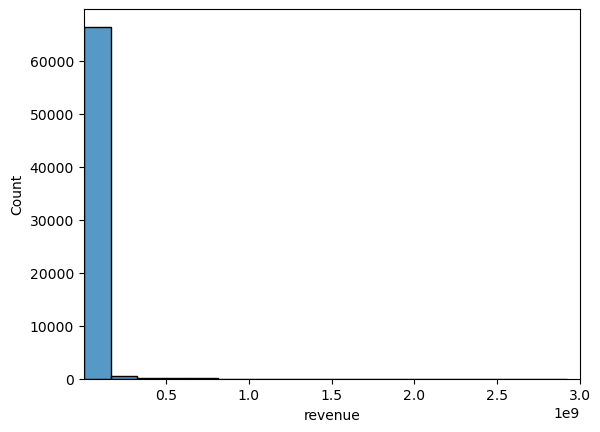

In [60]:
#revenue above $0
ax=sns.histplot(data=df, x='revenue')
ax.set_xlim(1,3000000000)

### How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [61]:
#saving the value counts of each category
val_counts = df['certification\r'].value_counts()
val_counts

\r                                   51102
R\r                                   6640
NR\r                                  3903
PG-13\r                               3464
PG\r                                  1567
G\r                                    491
NC-17\r                                177
Unrated\r                                5
UR\r                                     1
Not Rated\r                              1
ScreamFest Horror Film Festival\r        1
PG-13 \r                                 1
Name: certification\r, dtype: int64

Text(0.5, 0, 'Certification Categories')

) missing from current font.s\dojo-env\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from current font.s\dojo-env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


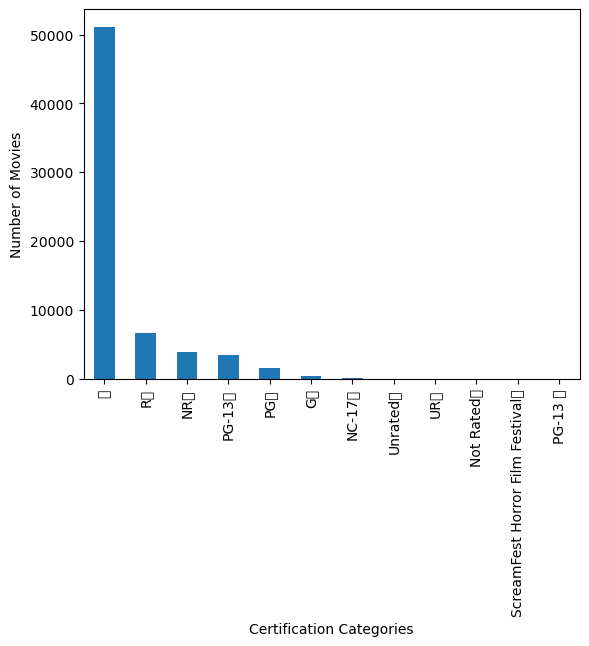

In [62]:
#Plot the answer to the question
ax = val_counts.plot(kind='bar')
ax.set_ylabel("Number of Movies");
ax.set_xlabel("Certification Categories")

### What is the average revenue per certification category?

) missing from current font.s\dojo-env\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from current font.s\dojo-env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


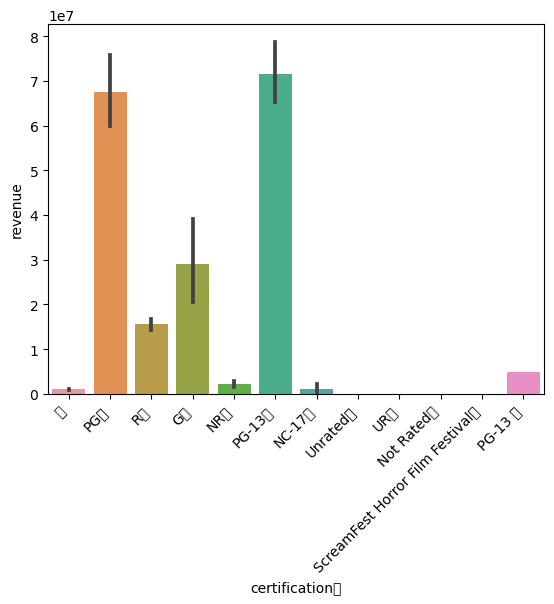

In [64]:
#Plot the average revenue of all certifications
ax = sns.barplot(data=df, x='certification\r', y='revenue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

### What is the average budget per certification category?

) missing from current font.s\dojo-env\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from current font.s\dojo-env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


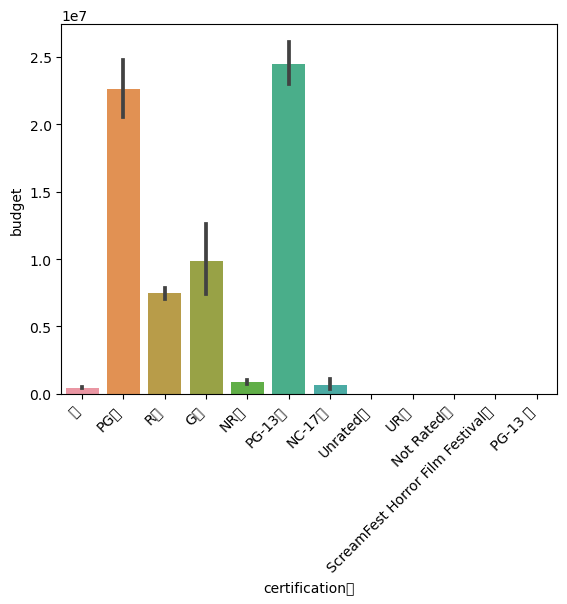

In [66]:
#Plot the average budget of all certifications
ax = sns.barplot(data=df, x='certification\r', y='budget')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');